# ***Project work on Painter style recognition, Group 29***
## **Qualitative Analysis**

Salvatore Grimaldi	0622701742	s.grimaldi29@studenti.unisa.it

Enrico Maria Di Mauro	0622701706	e.dimauro5@studenti.unisa.it

Allegra Cuzzocrea 	0622701707	a.cuzzocrea2@studenti.unisa.it

Andrea De Gruttola	0622701880	a.degruttola@studenti.unisa.it




The following notebook has been inspired by the one that can be found
[here](https://keisen.github.io/tf-keras-vis-docs/examples/attentions.html).
It is particular useful to show the way the network focuses on individual pixels to classify input images, so it gives us the chance to understand how the model internally works

In [1]:
from google.colab import drive
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from matplotlib import pyplot as plt
!pip install tf_keras_vis
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.saliency import Saliency
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.6 MB/s 


In [2]:
# mounting drive and changing path
drive.mount('/content/drive')
%cd drive/MyDrive/29/data/  

# path check
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1WkiM1CV9ZMwqVumq0o0qMEeIP4UMqwK-/29/data
/content/drive/.shortcut-targets-by-id/1WkiM1CV9ZMwqVumq0o0qMEeIP4UMqwK-/29/data


In [ ]:
model_name = '32_valAcc'
model = load_model('./models/' + model_name + '_finetuned_2')

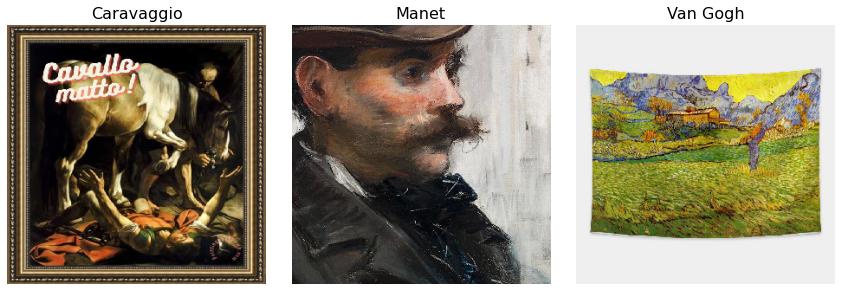

In [ ]:
image_titles = ['Caravaggio', 'Manet', 'Van Gogh']

# Load images and convert them to a Numpy array
img1 = load_img('full/CARAVAGGIO_CANVA/CARAVAGGIO_CANVA_21.jpg', target_size=(299, 299))
img2 = load_img('full/MANET/MANET_21.jpg', target_size=(299, 299))
img3 = load_img('full/VANGOGH/VANGOGH_4368.jpg', target_size=(299, 299))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])
X=images/255  # rescaling

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# When the softmax activation function is applied to the last layer of model (as in our case),
# it may obstruct generating the "attention images", so it is adviced to replace the
# function to a linear activation function
replace2linear = ReplaceToLinear()

#indexes corresponding to 'caravaggio', 'manet', 'vangogh'
score = CategoricalScore([0, 1, 2])

## Vanilla Saliency

`Saliency` generates a saliency map that appears the regions of ​​the input image that contributes the most to the output value.

In [ ]:
# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

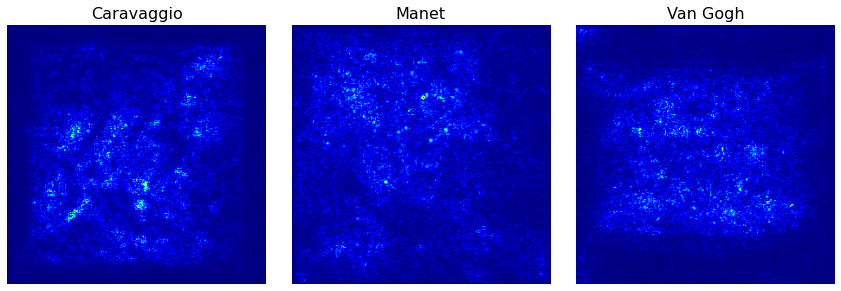

In [ ]:
# Generate saliency map
saliency_map = saliency(score, X)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## SmoothGrad

As you can see above, Vanilla Saliency map is too noisy, so let's remove noise in the saliency map using SmoothGrad! SmoothGrad is a method that reduce the noise in saliency map by adding noise to input image.

**Note:** Because SmoothGrad calculates the gradient repeatedly, it might take much time around 2-3 minutes when using CPU.

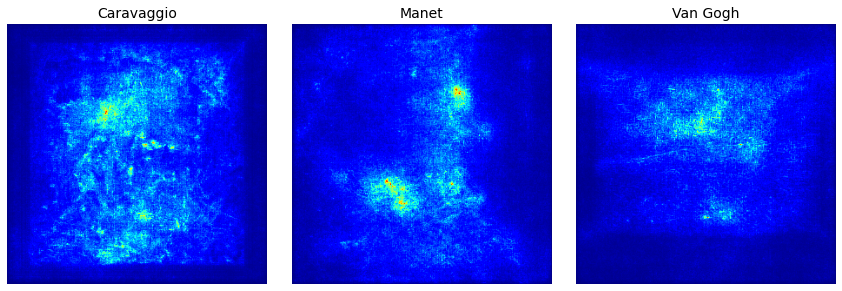

In [ ]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## GradCAM

Saliency is one of useful way of visualizing attention that appears the regions of the input image that contributes the most to the output value.
GradCAM is another way of visualizing attention over input. Instead of using gradients of model outputs, it uses of penultimate layer output (that is the convolutional layer just before Dense layers).

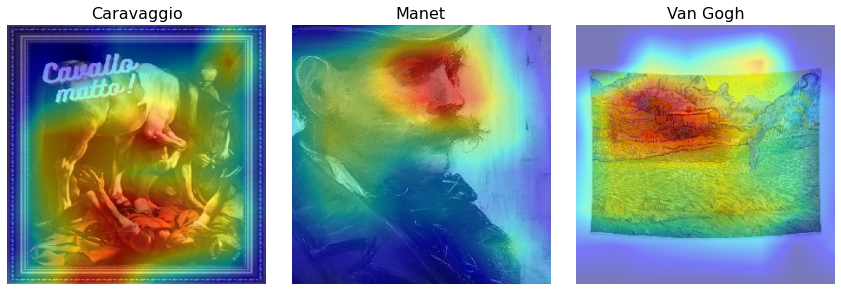

In [ ]:
# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              X,
              penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## GradCAM++

GradCAM++ can provide better visual explanations of CNN model predictions.

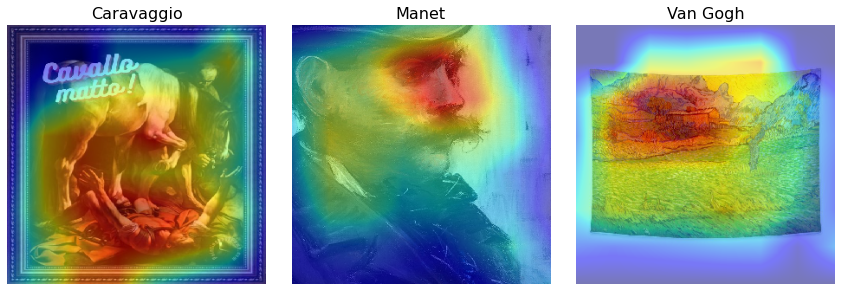

In [ ]:
# Create GradCAM++ object
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap with GradCAM++
cam = gradcam(score,
              X,
              penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()